In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import tikzplotlib
from collections import Counter
import numpy as np

## Read IMDb csv

In [2]:
imdb_df = pd.read_csv("data/imdb/imdb.ngram.csv", index_col=None)

In [3]:
imdb_df.head()

,year,imdb_ID,xml_ID,n_sentences,n_words,n_sentences_title,imdb_year,imdb_genres,imdb_countries,imdb_kind,imdb_languages,imdb_title,first_imdb_country,first_imdb_language,1_gram_count,2_gram_count,3_gram_count,4_gram_count,5_gram_count
0,2001,35423,3507231.xml,2184,16534,46,2001.0,Comedy;Fantasy;Romance,United States,movie,English;French,Kate & Leopold,United States,English,16534,14350,12177,10265,8545
1,1965,36574,214855.xml,509,3147,14,1965.0,NaN,West Germany,movie,German,"January 30, 1945",West Germany,German,3147,2638,2129,1682,1294
2,1954,38089,5640815.xml,657,5180,51,1954.0,Drama;War,Italy;France,movie,Italian,Siluri umani,Italy,Italian,5180,4523,3866,3256,2716
3,1950,40284,4657808.xml,1461,11010,56,1950.0,Drama;History,France;Italy,movie,French;Italian,Sins of Pompeii,France,French,11010,9549,8088,6768,5559
4,1950,40300,100294.xml,500,6351,26,1950.0,Drama,Mexico,movie,Spanish,The Devil Is a Woman,Mexico,Spanish,6351,5851,5353,4878,4424


## Bar Plot of Count of Movies and TV shows over decades

In [48]:
year_ticks = ["1950-1959", "1960-1969", "1970-1979", "1980-1989", "1990-1999", "2000-2009", "2010-2017"]
year_ticks = [f"{x:>10s}" for x in year_ticks]
year_axis = np.arange(7)

movie_count = []
tv_count = []

subtitle_year = imdb_df.year.values
imdb_kind = imdb_df.imdb_kind.values

for i in range(7):
    min_year = 1950 + 10*i
    max_year = min(min_year + 9, 2017)
    
    movie_count.append(((subtitle_year >= min_year) & (subtitle_year <= max_year) & (imdb_kind == "movie")).sum())
    tv_count.append(((subtitle_year >= min_year) & (subtitle_year <= max_year) & (imdb_kind == "episode")).sum())

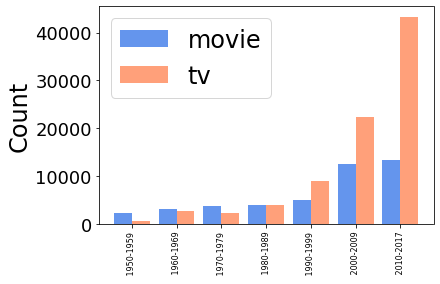

In [58]:
width = 0.4

plt.figure(figsize=(6, 4))
plt.rcParams.update({"font.size":18})

plt.bar(year_axis-width/2, movie_count, width=width, label="movie", color="cornflowerblue")
plt.bar(year_axis+width/2, tv_count, width=width, label="tv", color="lightsalmon")
plt.xticks(ticks=year_axis, labels=year_ticks, rotation=90, fontsize=8)
plt.legend(prop={"size":24})
plt.ylabel("Count", fontsize=24)
tikzplotlib.save("data/analysis_data/kind.tex")

plt.show()

## Bar Plot of IMDb Genre

In [6]:
imdb_genre = [genre for imdb_genre_str in imdb_df.imdb_genres.dropna() for genre in imdb_genre_str.split(";")]
len(imdb_genre)

379344

In [50]:
genre_count, genre_ticks = [], []

for genre, count in sorted(Counter(imdb_genre).items(), key=lambda x: x[1], reverse=True):
    genre_count.append(count)
    genre_ticks.append(genre)

genre_ticks = [f"{x:>10s}" for x in genre_ticks]
genre_axis = np.arange(len(genre_ticks))

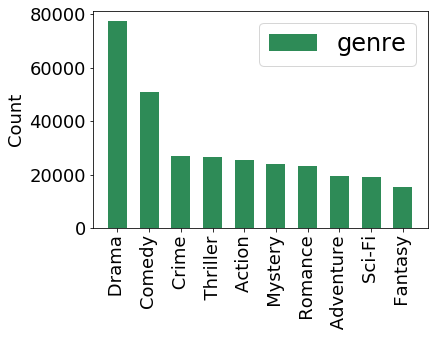

In [59]:
topk = 10

plt.figure(figsize=(6, 4))
plt.rcParams.update({"font.size":18})

plt.bar(genre_axis[:topk], genre_count[:topk], width=0.6, color="seagreen", label="genre")
plt.xticks(ticks=genre_axis[:topk], labels=genre_ticks[:topk], rotation=90)
plt.legend(prop={"size":24})
plt.ylabel("Count")
tikzplotlib.save("data/analysis_data/genre.tex")

plt.show()

## Bar Plot of IMDb Country

In [18]:
imdb_country = [country for imdb_country_str in imdb_df.imdb_countries.dropna() for country in imdb_country_str.split(";")]
len(imdb_country)

120887

In [52]:
country_count, country_ticks = [], []

for country, count in sorted(Counter(imdb_country).items(), key=lambda x: x[1], reverse=True):
    country_count.append(count)
    country = "U.S." if country == "United States" else country
    country = "U.K." if country == "United Kingdom" else country
    country_ticks.append(country)

country_ticks = [f"{x:>10s}" for x in country_ticks]
country_axis = np.arange(len(country_ticks))

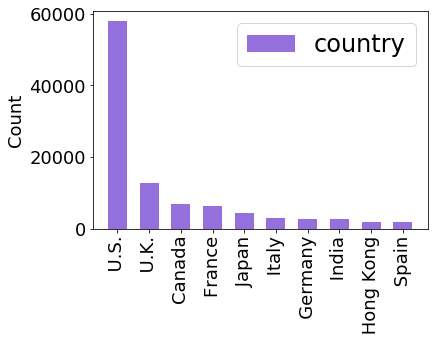

In [60]:
topk = 10

plt.figure(figsize=(6, 4))
plt.rcParams.update({"font.size":18})

plt.bar(country_axis[:topk], country_count[:topk], width=0.6, color="mediumpurple", label="country")
plt.xticks(ticks=country_axis[:topk], labels=country_ticks[:topk], rotation=90)
plt.legend(prop={"size":24})
plt.ylabel("Count")
tikzplotlib.save("data/analysis_data/country.tex")

plt.show()

## Bar Plot of IMDb Language

In [24]:
imdb_language = [language for imdb_language_str in imdb_df.imdb_languages.dropna() for language in imdb_language_str.split(";")]
len(imdb_language)

136926

In [56]:
lang_count, lang_ticks = [], []

for lang, count in sorted(Counter(imdb_language).items(), key=lambda x: x[1], reverse=True):
    lang_count.append(count)
    lang_ticks.append(lang)

lang_ticks = [f"{x:>10s}" for x in lang_ticks]
lang_axis = np.arange(len(lang_ticks))

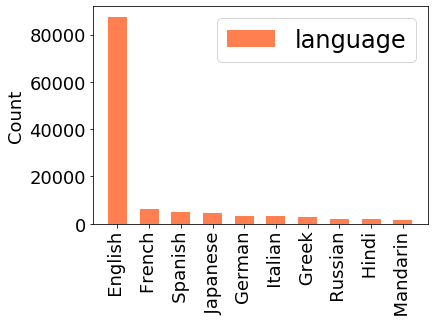

In [61]:
topk = 10

plt.figure(figsize=(6, 4))
plt.rcParams.update({"font.size":18})

plt.bar(lang_axis[:topk], lang_count[:topk], width=0.6, color="coral", label="language")
plt.xticks(ticks=lang_axis[:topk], labels=lang_ticks[:topk], rotation=90)
plt.legend(prop={"size":24})
plt.ylabel("Count")
tikzplotlib.save("data/analysis_data/language.tex")

plt.show()